                                                        Simple linear Regression

In [137]:
#import the necessary libraries
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [138]:
#Creating the dataFrame

np.random.seed(0)
# Data generation
num_samples = 400
engine_size = np.random.uniform(1.0, 5.0, num_samples)  # Tailles de moteur entre 1.0 et 5.0
co2_emissions = 25 * engine_size + np.random.normal(0, 10, num_samples)  # Relation linéaire avec bruit

# Creating the DataFrame
df = pd.DataFrame({
    'ENGINESIZE': engine_size,
    'CO2EMISSIONS': co2_emissions
})

In [139]:
df.head()

,ENGINESIZE,CO2EMISSIONS
0,3.195254,86.819082
1,3.860757,94.923202
2,3.411054,83.939322
3,3.179533,90.265756
4,2.694619,56.097222


In [140]:
# Division of data into training and test sets
msk = np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

In [141]:
#Train data preparation
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [142]:
#Model creation and training
regr = linear_model.LinearRegression()
regr.fit (train_x,train_y)


LinearRegression()

In [143]:
#Coefficient and intercept
print('coefficient ',regr.coef_)
print('intercept',regr.intercept_)


coeff  [[25.5580202]]
intercept [-2.75182108]


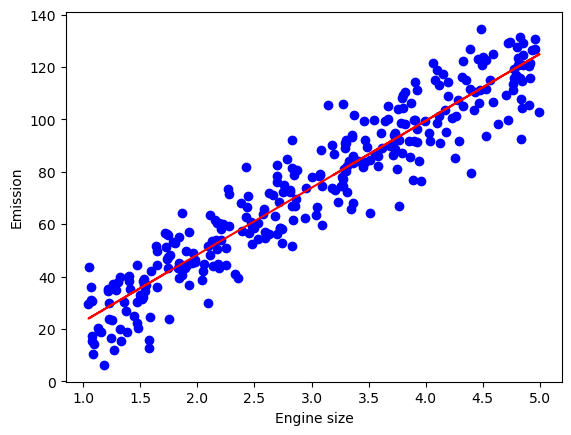

In [144]:
#Data plotting
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [145]:
#test preparation
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [146]:
#prediction
test_y_ = regr.predict(test_x)


In [147]:
#evaluation
print("Erreur absolue moyenne: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

Mean absolute error: 7.05
Residual sum of squares (MSE): 83.09
R2-score: 0.91
